# CLASSIFICACAO DE EMOCOES - ALEGRIA & MEDO

In [1]:
import pandas as pd
import numpy as np
import random
import spacy
import seaborn as sns
import string

In [2]:
base_train = pd.read_csv('../Dados/Bases_de_dados/base_treinamento.txt', encoding = 'utf-8')

In [3]:
base_train.shape

(196, 2)

In [4]:
base_train.head(16) # PRIMEIROS 5 REGISTOS OU DEFINIDOS

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [5]:
base_train.tail(10) # ULTIMOS 5 REGISTOS

,texto,emocao
186,a noite e muito perigosa,medo
187,estou estremecendo com essa casa,medo
188,olha aquela criatura se movendo monstruosamente,medo
189,não aguento este suspense,medo
190,afugente os cães,medo
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


C:\Users\leone\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


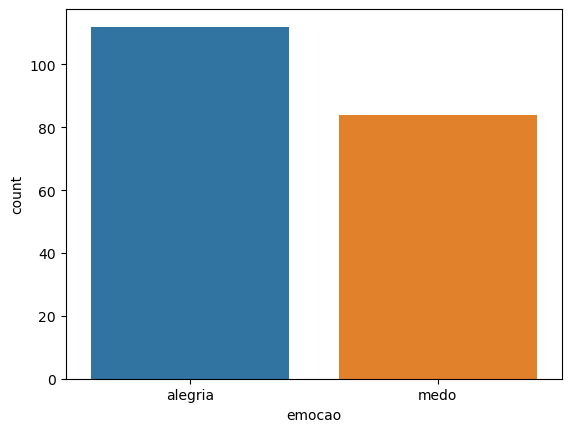

In [6]:
sns.countplot(base_train['emocao'], label = 'Contagem'); # constata-se desbalanceamento entre as instancias

# PRE-PROCESSAMENTO

In [7]:
#VERIFICACAO DE PONTUACOES
pontos = string.punctuation
pontos

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
# Visualizacao de stop words
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [9]:
len(stop_words)

416

In [10]:
# CARREGAMENTO DO MODULO SPACY EM PORTUGUES
pln = spacy.load('pt_core_news_sm')
pln

In [11]:
#CRIACAO DA FUNCAO PARA O PREPROCESSAMENTO
def preprocessamento(texto):
    texto = texto.lower() # conversao de todo o texto em minusculas
    documento = pln(texto) # Objeto
    
    lista = []
    for token in documento:
        lista.append(token.lemma_)# funcao de lematizacao
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontos]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()]) # REMOCAO DE NUMERICOS
    return lista        

In [12]:
teste = preprocessamento('Estou AprenNdendo 1 10 12 preprocessamento de linguagem natural, Curso ML')
teste

'aprenndendo preprocessamento linguagem natural curso ml'

# PRE_PROCESSAMENTO DA BASE DE DADOS

In [13]:
base_train.head(13)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [14]:
base_train['texto'] = base_train['texto'].apply(preprocessamento) # aplicacao do prep anterior
base_train.head(12)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adoro,alegria
5,adorar cabelo Macio,alegria
6,adorar cor de o olho,alegria
7,somo amávil outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


# TRATAMENTO DA CLASSE PARA SUBMETER AO ALGORITMO SPACY

In [15]:
exemplo_base_train = [['Este trabalho e agradavel', {'ALEGRIA': True, 'MEDO': False}],
                     ['Este lugar continua assustador', {'ALEGRIA': False, 'MEDO': True}]]

In [16]:
type(exemplo_base_train)

list

In [17]:
exemplo_base_train[0][0]

'Este trabalho e agradavel'

In [18]:
exemplo_base_train[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [19]:
type(exemplo_base_train[0][1])

dict

In [20]:
base_train_final = []
for texto, emocao in zip(base_train['texto'], base_train['emocao']):
    if emocao == 'alegria':
        dic = ({'ALEGRIA': True, 'MEDO': False})
    elif emocao == 'medo':
        dic = ({'ALEGRIA': False, 'MEDO': True})
    base_train_final.append([texto, dic.copy()])

In [21]:
 len(base_train_final)

196

In [22]:
base_train_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adoro', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo Macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amávil outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentindar animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto hoje', {'ALEGRIA': T

# CRIACAO DO CLASSIFICADOR

In [23]:
modelo = spacy.blank('pt')
categorias = modelo.add_pipe("textcat")
categorias.add_label('ALEGRIA')
categorias.add_label('MEDO')
#modelo.add_pipe(categorias)
historico = []

In [24]:
from spacy.vocab import Vocab
from spacy.language import Language
modelo.begin_training()
for epoca in range(200):
    random.shuffle(base_train_final)
    losses = {}
    for batch in spacy.util.minibatch(base_train_final, 30):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        #modelo = Language(Vocab())
        #modelo.update([textos], losses = losses, drop = 0.3)
    if epoca % 100 == 0:
        print(losses)
        historico.append(losses)

{}
{}


In [25]:
modelo.to_disk("model_spacy")

In [26]:
modelo = spacy.load('model_spacy')
modelo

In [27]:
texto_P = 'O meu supervisor e bom demais'
previsao = modelo(preprocessamento(texto_P))
previsao.cats

{'ALEGRIA': 0.5, 'MEDO': 0.5}

In [28]:
texto_N = 'Ela teme morrer de afogamento'
previsao = modelo(preprocessamento(texto_N))
previsao.cats

{'ALEGRIA': 0.5, 'MEDO': 0.5}

In [ ]:
previsoes